In [0]:
from keras.layers import Input, Dense
from keras.models import Model
import os
from keras.callbacks import TensorBoard
from keras import regularizers

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)


# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-7))(encoded)


# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]


# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



Wait for 8 seconds...
TensorBoard link:
https://f8333828.ngrok.io
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.3674 - val_loss: 0.2696
Epoch 2/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.2645 - val_loss: 0.2558
Epoch 3/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.2444 - val_loss: 0.2329
Epoch 4/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.2223 - val_loss: 0.2104
Epoch 5/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.2031 - val_loss: 0.1942
Epoch 6/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1900 - val_loss: 0.1832
Epoch 7/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1801 - val_loss: 0.1746
Epoch 8/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1731 - val_loss: 0.1692
Epoch 9/50
60000/60000 [===============

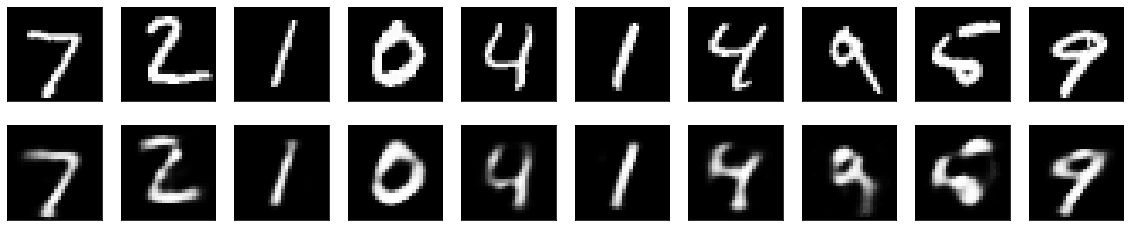

Saved model to disk


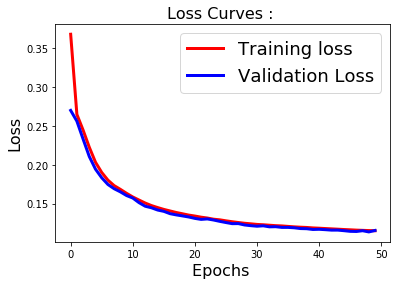

In [23]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))




from tensorboardcolab import *
tbc=TensorBoardColab()
ENCODE_DIR = os.getcwd()
tensorboard = TensorBoard(log_dir='ENCODE_DIR', histogram_freq=0,
                         write_graph=True, write_images=False)
history=autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),callbacks=[TensorBoardColabCallback(tbc)])



# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Saving the model

from keras.models import model_from_json

# serialize model to JSON
model_json = autoencoder.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
autoencoder.save_weights("model.h5")
print("Saved model to disk")


fig1 = plt.figure()
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves : ', fontsize=16)
fig1.savefig('loss_lstm.png')